In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Variable Name	Role	Type	Demographic	Description	Units	Missing Values
1. age	Feature	Integer	Age		years	no
2. sex	Feature	Categorical	Sex			no
3. cp	Feature	Categorical				no
4. trestbps	Feature	Integer		resting blood pressure (on admission to the hospital)	mm Hg	no
5. chol	Feature	Integer		serum cholestoral	mg/dl	no
6. fbs	Feature	Categorical		fasting blood sugar > 120 mg/dl		no
7. restecg	Feature	Categorical				no
8. thalach	Feature	Integer		maximum heart rate achieved		no
9. exang	Feature	Categorical		exercise induced angina		no
10. oldpeak	Feature	Integer		ST depression induced by exercise relative to rest		no

In [2]:
data = pd.read_csv("Heart_Disease_Prediction.csv")
data["Heart Disease"] = data["Heart Disease"].map({"Absence":0, "Presence": 1})
data = data.rename(columns={'EKG results': 'ECG results'})
data = data[data['ECG results'] != 1]
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,ECG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [3]:
data.shape

(268, 14)

In [4]:
data["Heart Disease"].value_counts()

Heart Disease
0    149
1    119
Name: count, dtype: int64

In [5]:
149/(149+119)

0.5559701492537313

In [6]:
pd.DataFrame(data.isna().sum().sort_values(ascending=False), columns = ["NaN counts"])

,NaN counts
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
ECG results,0
Max HR,0
Exercise angina,0
ST depression,0


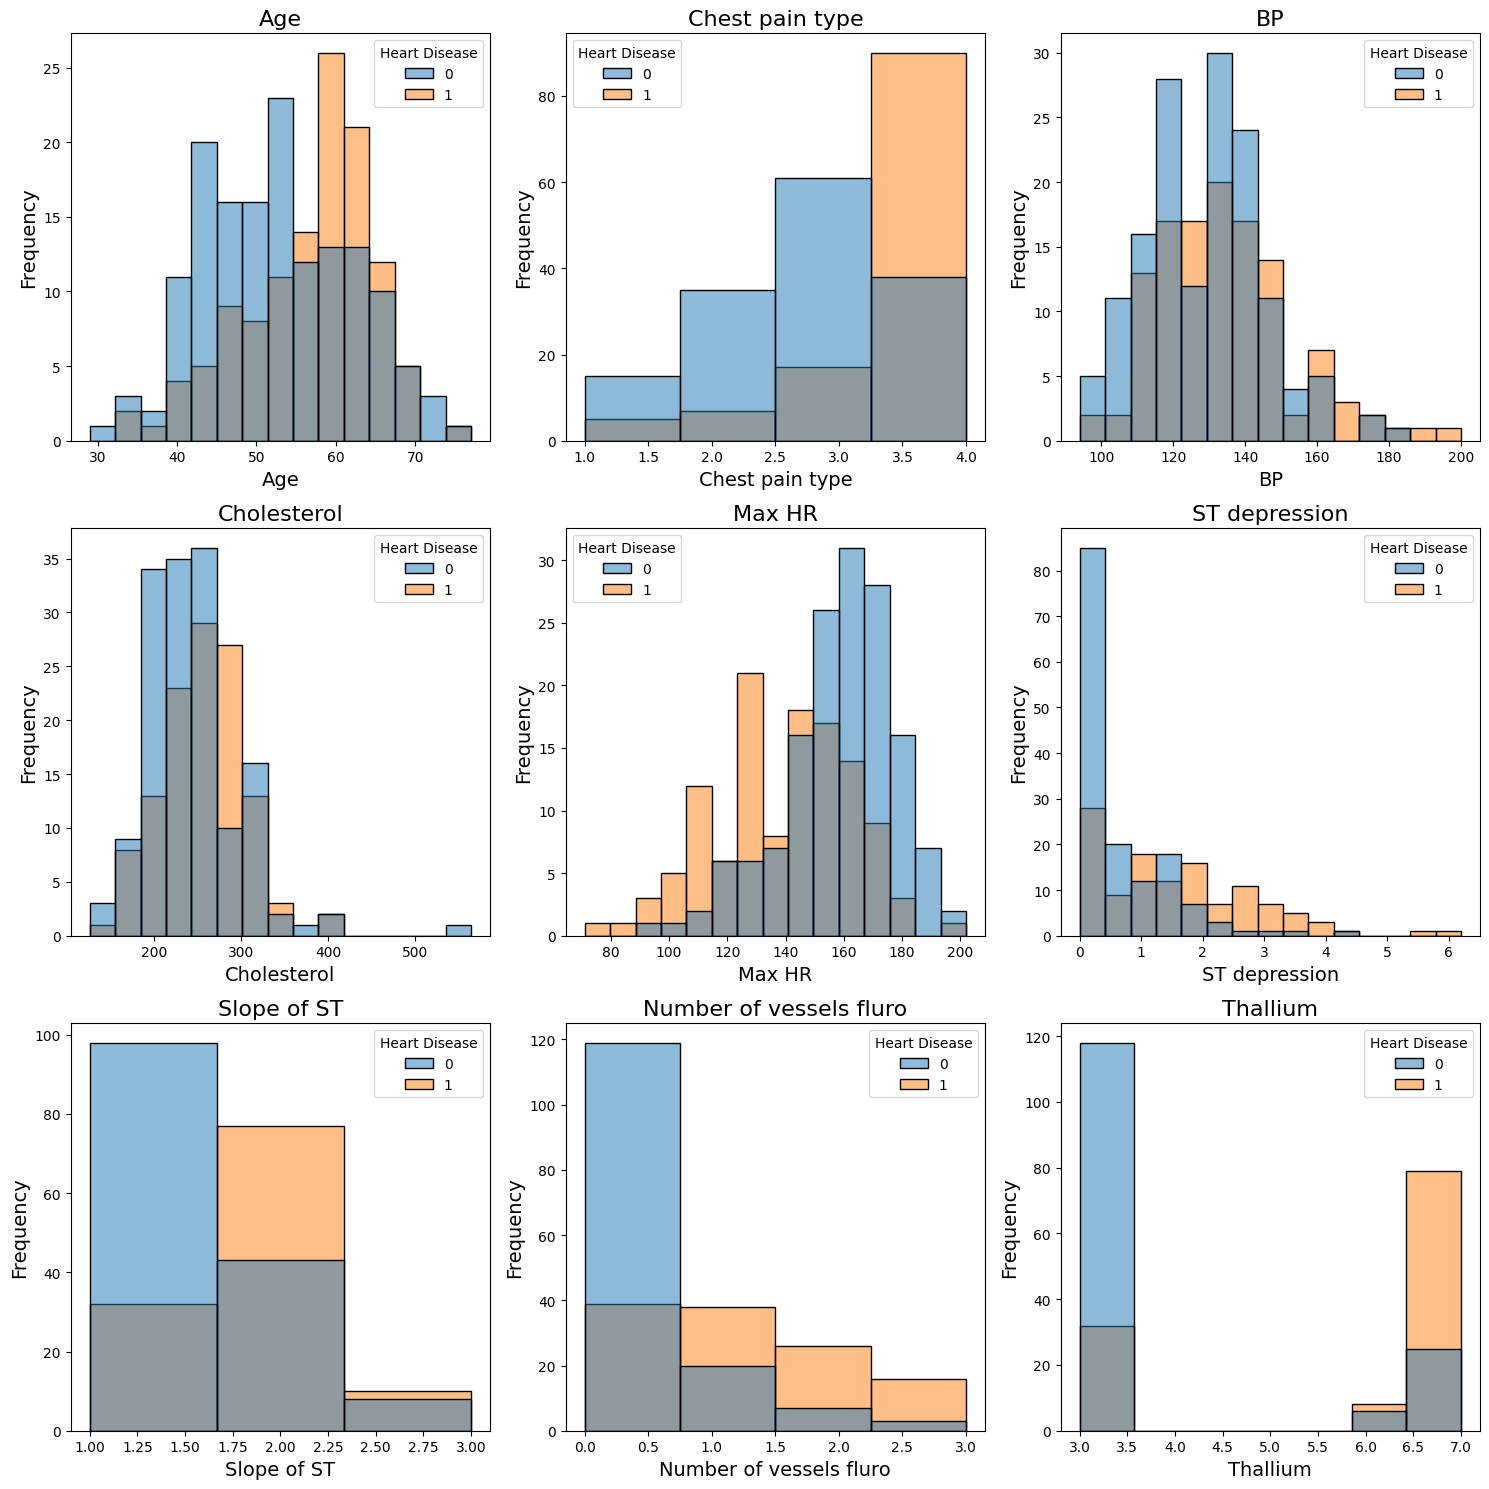

In [18]:
numerical_vars = data.select_dtypes(include='number').columns.tolist()
numerical_vars = [var for var in numerical_vars if len(data[var].unique()) > 2]
ncols = 3

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(numerical_vars) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()

# Loop through variables and create histograms
for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    bins = min([len(data[variable].value_counts()),15])
    if variable == "Thallium":
        bins = 7
    sns.histplot(data = data, x = variable, ax=ax, bins = bins, hue = "Heart Disease", hue_order = [0,1])
    ax.set_title(variable, fontsize=16) 
    ax.set_xlabel(variable, fontsize=14) 
    ax.set_ylabel('Frequency', fontsize=14)

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [8]:
pastel_palette = sns.color_palette("pastel")

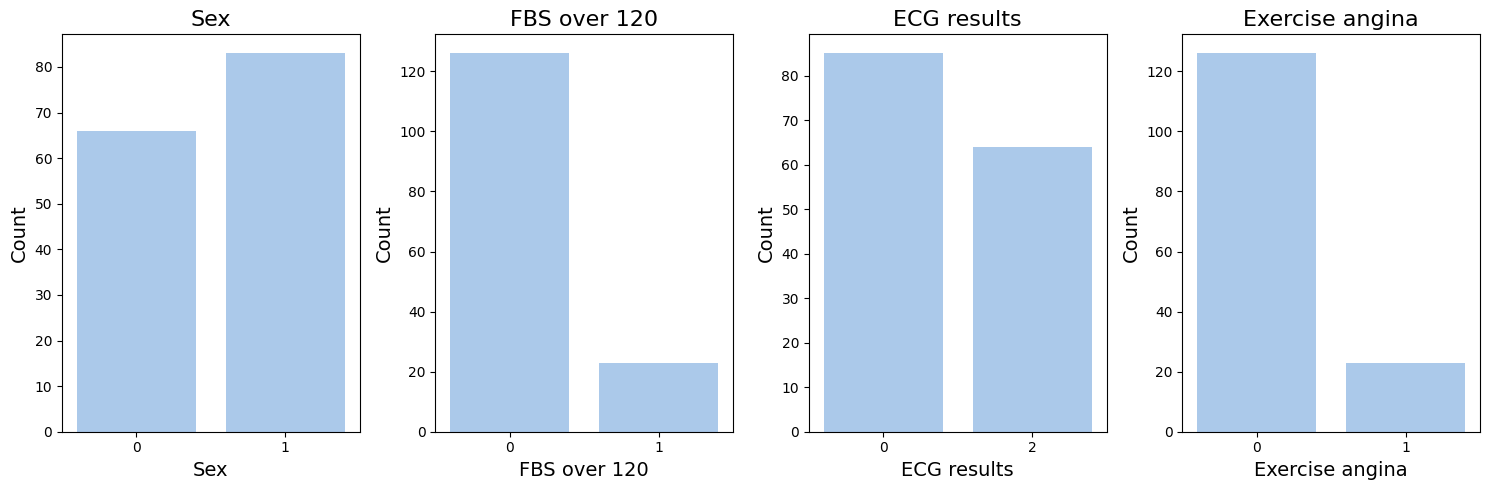

In [20]:
# Identify binary variables
binary_vars = [var for var in data.select_dtypes(include='number').columns if len(data[var].unique()) == 2 and var != 'Heart Disease']


ncols = 4  # Number of columns for the subplot grid
nrows = -(-len(binary_vars) // ncols)  # Ceiling division to calculate rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten axes for easier iteration

# Filter data for Heart Disease = 0
class_0_data = data[data['Heart Disease'] == 0]

# Loop through binary variables and create bar charts
for i, var in enumerate(binary_vars):
    sns.countplot(x=var, data=class_0_data, ax=axes[i], color = pastel_palette[0])
    axes[i].set_title(var, fontsize=16)
    axes[i].set_xlabel(var, fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)

# Remove empty subplots (if any)
for j in range(len(binary_vars), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


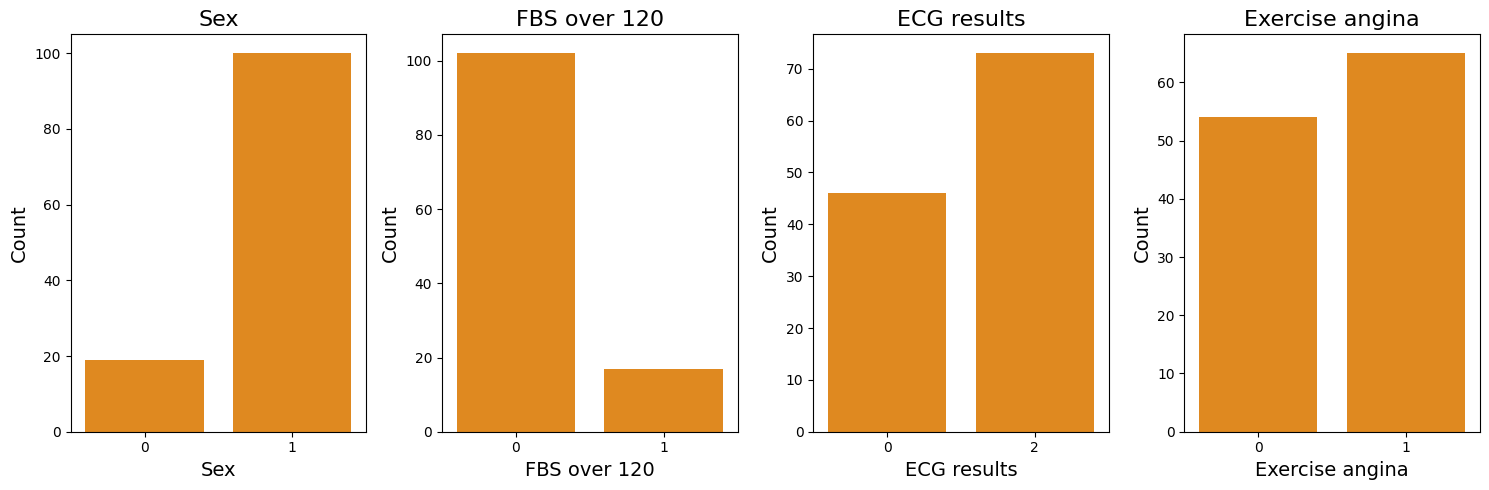

In [21]:
# Identify binary variables
binary_vars = [var for var in data.select_dtypes(include='number').columns if len(data[var].unique()) == 2 and var != 'Heart Disease']


ncols = 4  # Number of columns for the subplot grid
nrows = -(-len(binary_vars) // ncols)  # Ceiling division to calculate rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten axes for easier iteration

# Filter data for Heart Disease = 0
class_0_data = data[data['Heart Disease'] == 1]

# Loop through binary variables and create bar charts
for i, var in enumerate(binary_vars):
    sns.countplot(x=var, data=class_0_data, ax=axes[i], color = "darkorange")
    axes[i].set_title(var, fontsize=16)
    axes[i].set_xlabel(var, fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)

# Remove empty subplots (if any)
for j in range(len(binary_vars), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

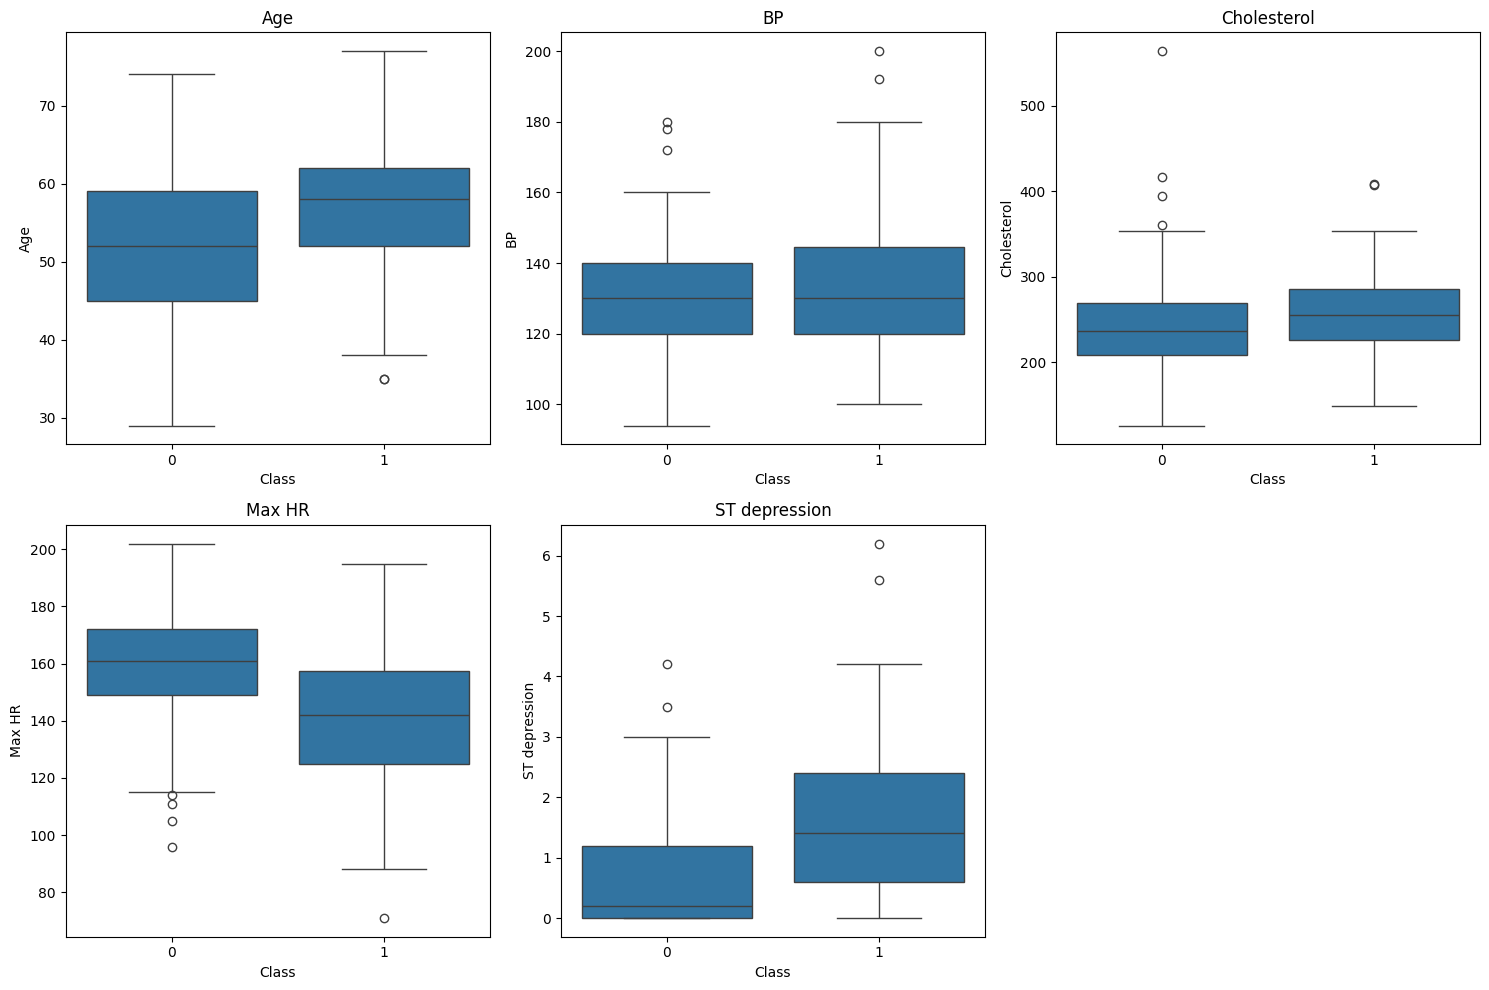

In [11]:
numerical_vars = [col for col in data.select_dtypes(include='number').columns if data[col].nunique() > 5]
ncols = 3

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(numerical_vars) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()

# Loop through variables and create boxplots
for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    sns.boxplot(data=data, x='Heart Disease', y=variable, ax=ax)  # Change to boxplot
    ax.set_title(variable)
    ax.set_xlabel('Class')
    ax.set_ylabel(variable)

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
data.agg(['min', 'max'])

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,ECG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
min,29,0,1,94,126,0,0,71,0,0.0,1,0,3,0
max,77,1,4,200,564,1,2,202,1,6.2,3,3,7,1


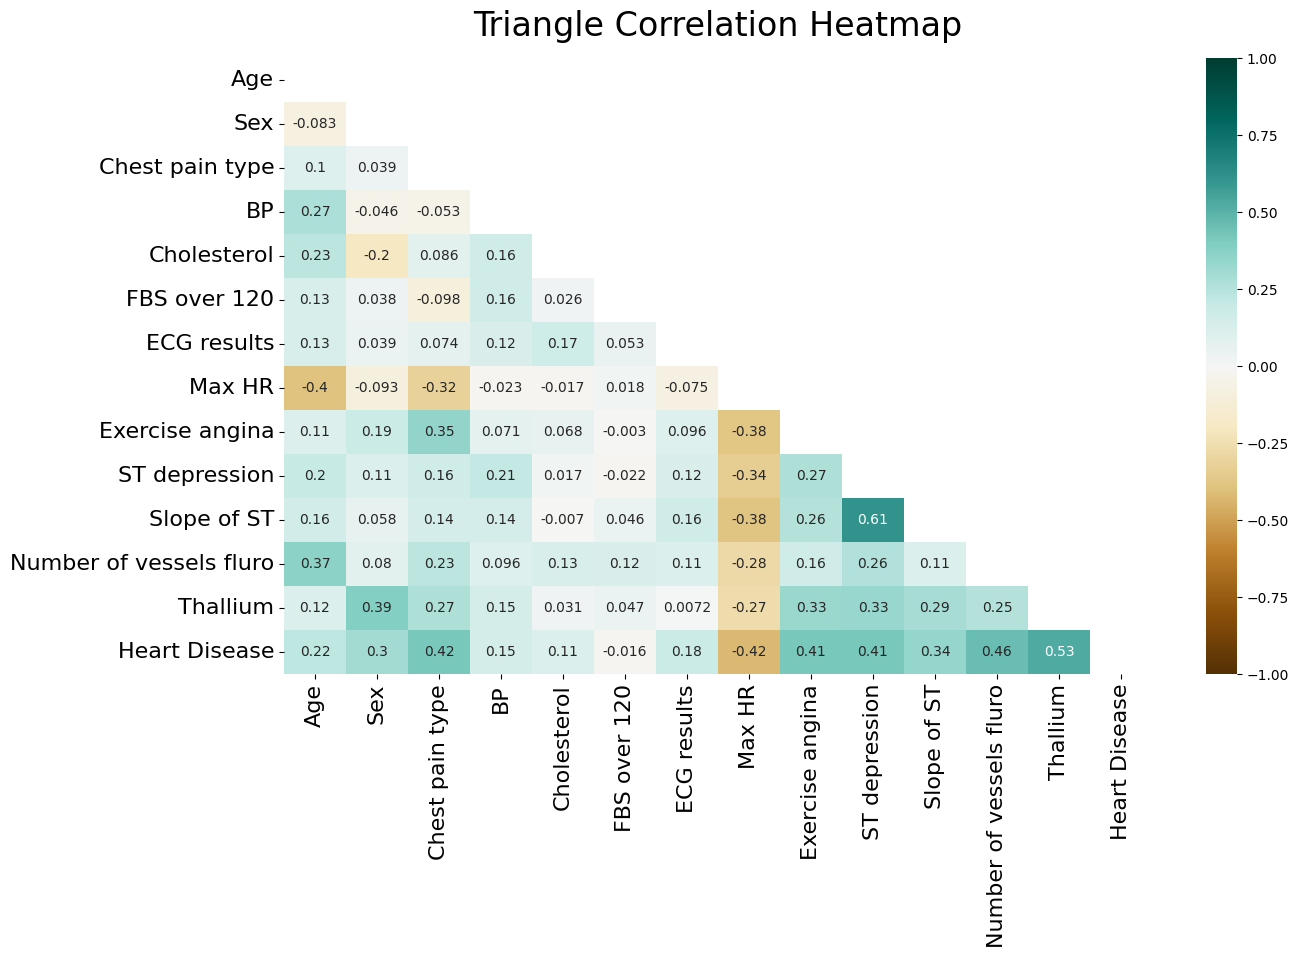

In [27]:
plt.figure(figsize=(14, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool_))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':24}, pad=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()